In [58]:
import sqlite3
import pandas as pd

# Database file path
db_path = r"C:\Users\yamaguchi\MyDocument\gmo_data\trading_hist\2023-08-21_trading_hist.db"

# Connect to the database
conn = sqlite3.connect(db_path)

# Query to get the list of tables in the database
query = "SELECT name FROM sqlite_master WHERE type='table';"

# Execute the query
tables = conn.execute(query).fetchall()
table_names = [table[0] for table in tables]
# table_names

# Load the 'trading_history' table into a DataFrame
df_trading_history = pd.read_sql("SELECT * FROM trading_history", conn)

# Close the database connection
conn.close()

# Drop the 'id' column from the DataFrame
df_trading_history = df_trading_history.drop(columns=['id'])
df_trading_history.head()


,timestamp,price,channel,size,side,column
0,2023-08-21 00:00:17.502000,3814600,trades,0.0070,BUY,BTC
1,2023-08-21 00:00:17.502000,3814600,trades,0.1029,BUY,BTC
2,2023-08-21 00:00:50.484000,3814979,trades,0.0001,SELL,BTC
3,2023-08-21 00:02:24.537000,3814980,trades,0.0078,SELL,BTC
4,2023-08-21 00:02:24.537000,3815469,trades,0.0022,SELL,BTC


In [47]:
pd.set_option('display.max_rows', 500)

# Filter rows where there's more than one unique value for 'price' or 'side' within the same timestamp
filtered_df = grouped_df[(grouped_df['unique_prices'] > 1)]

# Display the filtered results
filtered_df['unique_prices']

timestamp
2023-08-21 00:02:24.537000     2
2023-08-21 00:02:28.837000     3
2023-08-21 00:07:02.488000     5
2023-08-21 00:08:07.018000     2
2023-08-21 00:08:07.086000     2
2023-08-21 00:08:07.135000     6
2023-08-21 00:08:17.631000     2
2023-08-21 00:08:32.388000     3
2023-08-21 00:08:34.222000     2
2023-08-21 00:09:50.371000     2
2023-08-21 00:11:40.409000     4
2023-08-21 00:18:03.168000    16
2023-08-21 00:18:27.735000     2
2023-08-21 00:19:21.117000     3
2023-08-21 00:26:30.537000     2
2023-08-21 00:26:40.759000     2
2023-08-21 00:29:03.837000     6
2023-08-21 00:29:42.730000     5
2023-08-21 00:35:51.977000     2
2023-08-21 00:35:53.326000     2
2023-08-21 00:43:05.971000     2
2023-08-21 00:50:28.362000     4
2023-08-21 00:54:06.040000     2
2023-08-21 00:54:57.304000     4
2023-08-21 01:10:16.954000     2
2023-08-21 01:16:38.990000     3
2023-08-21 01:20:53.305000     6
2023-08-21 01:26:26.566000     2
2023-08-21 01:35:22.061000     2
2023-08-21 01:37:59.365000     3


In [6]:
from funcs import dbpd r"C:\Users\yamaguchi\MyDocument\gmo_data\trading_hist\2023-08-21_trading_hist.db"
db_path = 
tmp = dbpd(db_path)
tmp['id'] = tmp.index + 1
tmp


,timestamp,price,channel,size,side,column,id
0,2023-08-21 00:00:17.502000,3814600,trades,0.0070,BUY,BTC,1
1,2023-08-21 00:00:17.502000,3814600,trades,0.1029,BUY,BTC,2
2,2023-08-21 00:00:50.484000,3814979,trades,0.0001,SELL,BTC,3
3,2023-08-21 00:02:24.537000,3814980,trades,0.0078,SELL,BTC,4
4,2023-08-21 00:02:24.537000,3815469,trades,0.0022,SELL,BTC,5
...,...,...,...,...,...,...,...
2713,2023-08-21 23:48:43.724000,3830000,trades,0.0001,SELL,BTC,2714
2714,2023-08-21 23:50:53.892000,3830000,trades,0.0010,SELL,BTC,2715
2715,2023-08-21 23:51:16.726000,3830000,trades,0.0010,SELL,BTC,2716
2716,2023-08-21 23:55:58.853000,3830000,trades,0.1000,SELL,BTC,2717


In [3]:
from funcs import dbpd, min_trading_history
import pandas as pd

def filter_time(df, start_time, end_time):
    """
    Filter the DataFrame based on a specified time range.
    
    Parameters:
    - df: DataFrame containing the data
    - start_time: The start of the time range (string in the format 'YYYY-MM-DD HH:MM:SS.ssssss')
    - end_time: The end of the time range (string in the format 'YYYY-MM-DD HH:MM:SS.ssssss')
    
    Returns:
    - DataFrame containing the filtered data
    """
    # Convert the strings to datetime format
    start_time = pd.to_datetime(start_time)
    end_time = pd.to_datetime(end_time)
    
    # Filter the DataFrame
    return df[(df['timestamp'] >= start_time) & (df['timestamp'] <= end_time)]

# Example of using the function
example_start_time = '2023-08-21 00:00:17.000000'
example_end_time = '2023-08-21 12:01:50.500000'
tmp = dbpd(r"C:\Users\yamaguchi\MyDocument\gmo_data\trading_hist\2023-08-21_trading_hist.db")
filtered_data = filter_time(tmp, example_start_time, example_end_time)
filtered_data

,timestamp,price,channel,size,side,column
0,2023-08-21 00:00:17.502,3814600,trades,0.0070,BUY,BTC
1,2023-08-21 00:00:17.502,3814600,trades,0.1029,BUY,BTC
2,2023-08-21 00:00:50.484,3814979,trades,0.0001,SELL,BTC
3,2023-08-21 00:02:24.537,3814980,trades,0.0078,SELL,BTC
4,2023-08-21 00:02:24.537,3815469,trades,0.0022,SELL,BTC
...,...,...,...,...,...,...
1509,2023-08-21 11:55:10.109,3809999,trades,0.0005,BUY,BTC
1510,2023-08-21 11:56:22.282,3809999,trades,0.0020,BUY,BTC
1511,2023-08-21 11:57:25.351,3810000,trades,0.0013,SELL,BTC
1512,2023-08-21 12:00:50.886,3810000,trades,0.0003,SELL,BTC


In [28]:
min_trading_history(r"C:\Users\yamaguchi\MyDocument\gmo_data\trading_hist\2023-08-21_trading_hist.db")

,timestamp,price,channel,size,side,column,id
0,2023-08-21 00:00:17.502,3814600,trades,0.1099,BUY,BTC,1
1,2023-08-21 00:00:50.484,3814979,trades,0.0001,SELL,BTC,3
2,2023-08-21 00:02:24.537,3815224,trades,0.0100,SELL,BTC,4
3,2023-08-21 00:02:28.837,3814054,trades,0.0060,BUY,BTC,6
4,2023-08-21 00:03:07.663,3815469,trades,0.1049,SELL,BTC,10
...,...,...,...,...,...,...,...
1714,2023-08-21 23:48:43.724,3830000,trades,0.0001,SELL,BTC,2714
1715,2023-08-21 23:50:53.892,3830000,trades,0.0010,SELL,BTC,2715
1716,2023-08-21 23:51:16.726,3830000,trades,0.0010,SELL,BTC,2716
1717,2023-08-21 23:55:58.853,3830000,trades,0.1000,SELL,BTC,2717


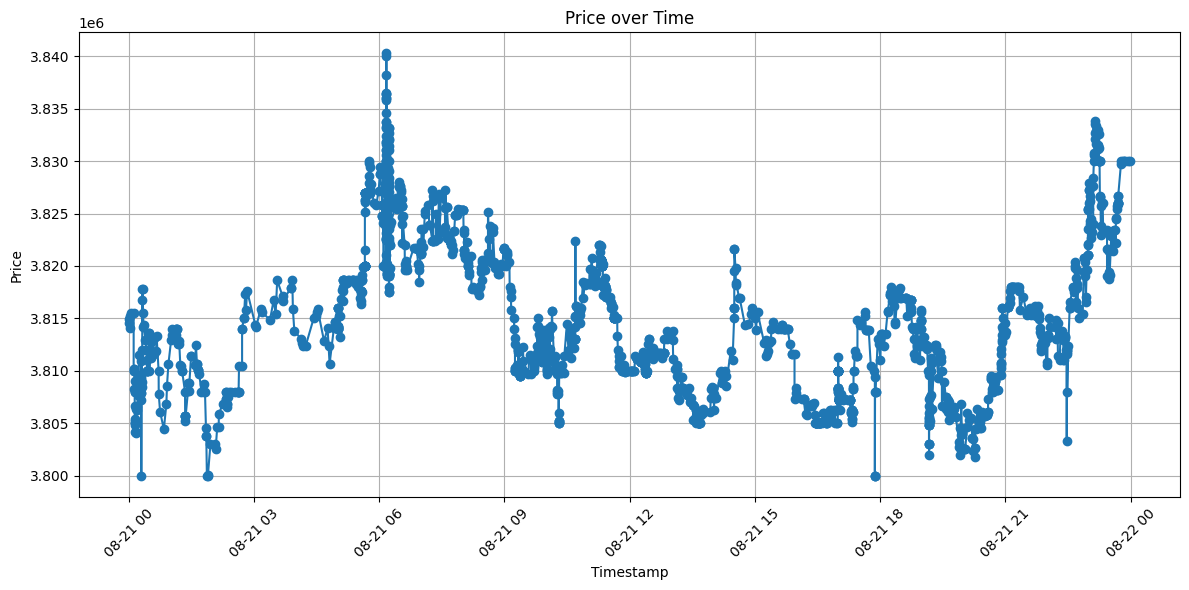

In [199]:
plt.figure(figsize=(12, 6))
plt.plot(sorted_result['timestamp'], sorted_result['price'], marker='o', linestyle='-')
plt.title('Price over Time')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

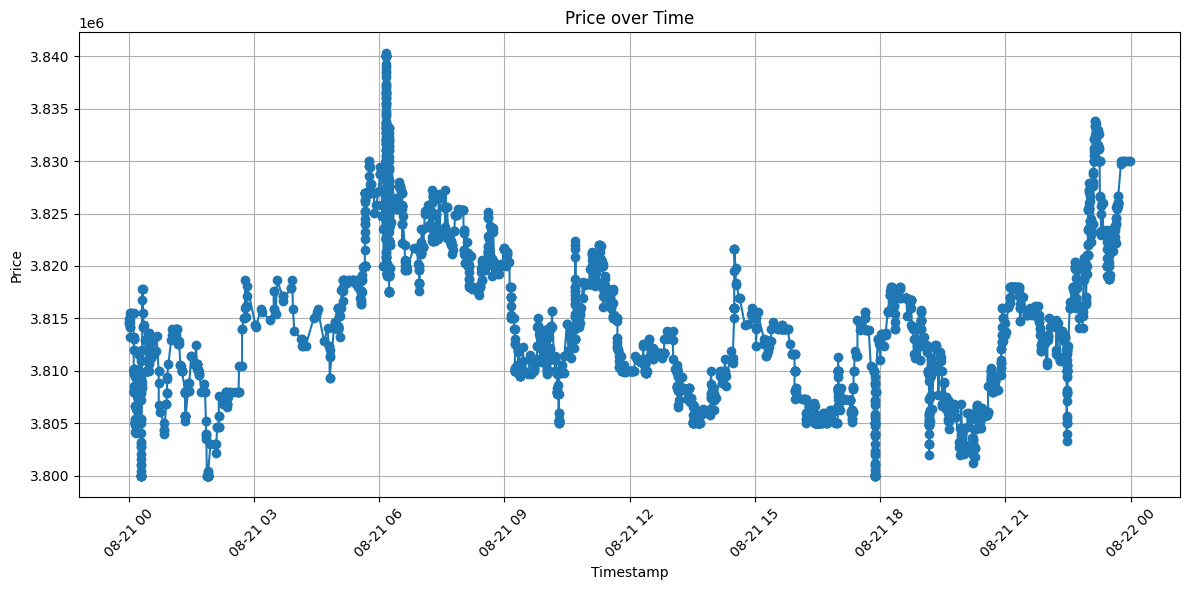

In [200]:
import sqlite3
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect(r'C:\Users\yamaguchi\MyDocument\gmo_data\trading_hist\2023-08-21_trading_hist.db')

# Read the data from the database
df_from_db = pd.read_sql_query("SELECT * FROM trading_history", conn)

# Convert the 'timestamp' column to datetime format
df_from_db['timestamp'] = pd.to_datetime(df_from_db['timestamp'])

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df_from_db['timestamp'], df_from_db['price'], marker='o', linestyle='-')
plt.title('Price over Time')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
class Bandit:
    def __init__(self, df, n=10, timestamp):

        self.rates = []
        # df['timestamp'] == timestampのデータを取得 => timestamp_dataに代入
        # if df['timestamp'] == timestampで取得したデータが複数の場合は一つ目のデータをtimestamp_dataに代入
        # timestamp_dataから前後n/2個のデータ(timestampを含む)を順序を守ってratesに格納

    def play(self, arm):
        rate = self.rates[arm]
        if rate > np.random.rand():
            return 1
        else:
            return 0


In [6]:
# Define Bandit class
class Bandit:
    def __init__(self, df, n=10):
        self.df = df
        self.n = n
        self.rates = self.get_rates()

    def get_rates(self):
        rates = []
        for i in range(0, len(self.df), self.n):
            rates.append(self.df.iloc[i:i+self.n])
        return rates

# Initialize Bandit with n=2
bandit = Bandit(df_th, n=10)

# Display first two rates as an example
bandit.rates[:2]

[                timestamp    price channel    size  side column
 0 2023-08-21 00:00:17.502  3814600  trades  0.0070   BUY    BTC
 1 2023-08-21 00:00:17.502  3814600  trades  0.1029   BUY    BTC
 2 2023-08-21 00:00:50.484  3814979  trades  0.0001  SELL    BTC
 3 2023-08-21 00:02:24.537  3814980  trades  0.0078  SELL    BTC
 4 2023-08-21 00:02:24.537  3815469  trades  0.0022  SELL    BTC
 5 2023-08-21 00:02:28.837  3814600  trades  0.0001   BUY    BTC
 6 2023-08-21 00:02:28.837  3814209  trades  0.0013   BUY    BTC
 7 2023-08-21 00:02:28.837  3814209  trades  0.0010   BUY    BTC
 8 2023-08-21 00:02:28.837  3813201  trades  0.0036   BUY    BTC
 9 2023-08-21 00:03:07.663  3815469  trades  0.0050  SELL    BTC,
                  timestamp    price channel    size  side column
 10 2023-08-21 00:03:07.663  3815469  trades  0.0999  SELL    BTC
 11 2023-08-21 00:07:02.488  3815469  trades  0.0001  SELL    BTC
 12 2023-08-21 00:07:02.488  3813185  trades  0.0050  SELL    BTC
 13 2023-08-21 00:07

In [9]:
from funcs import dbpd

df_th = dbpd(r"C:\Users\yamaguchi\MyDocument\gmo_data\trading_hist\2023-08-21_trading_hist.db")

bandit = Bandit(df_th, n=15)
bandit.rates[:2]

[                 timestamp    price channel    size  side column
 0  2023-08-21 00:00:17.502  3814600  trades  0.0070   BUY    BTC
 1  2023-08-21 00:00:17.502  3814600  trades  0.1029   BUY    BTC
 2  2023-08-21 00:00:50.484  3814979  trades  0.0001  SELL    BTC
 3  2023-08-21 00:02:24.537  3814980  trades  0.0078  SELL    BTC
 4  2023-08-21 00:02:24.537  3815469  trades  0.0022  SELL    BTC
 5  2023-08-21 00:02:28.837  3814600  trades  0.0001   BUY    BTC
 6  2023-08-21 00:02:28.837  3814209  trades  0.0013   BUY    BTC
 7  2023-08-21 00:02:28.837  3814209  trades  0.0010   BUY    BTC
 8  2023-08-21 00:02:28.837  3813201  trades  0.0036   BUY    BTC
 9  2023-08-21 00:03:07.663  3815469  trades  0.0050  SELL    BTC
 10 2023-08-21 00:03:07.663  3815469  trades  0.0999  SELL    BTC
 11 2023-08-21 00:07:02.488  3815469  trades  0.0001  SELL    BTC
 12 2023-08-21 00:07:02.488  3813185  trades  0.0050  SELL    BTC
 13 2023-08-21 00:07:02.488  3813000  trades  0.0030  SELL    BTC
 14 2023-0

In [22]:
class Bandit:
    def __init__(self, df, timestamp, n=10):

        self.rates = []
        
        # Get rows matching the given timestamp
        matching_rows = df[df['timestamp'] == timestamp]
        
        # If multiple rows match, take the first one
        timestamp_data = matching_rows.iloc[0]
        
        # Find the index of the timestamp_data in the original dataframe
        index_of_timestamp = df.index[df['timestamp'] == timestamp_data['timestamp']].tolist()[0]
        
        # Calculate start and end indices to fetch n data points centered around the given timestamp
        start_index = max(0, index_of_timestamp - n//2)
        end_index = min(len(df), index_of_timestamp + n//2 + 1)  # +1 to include the endpoint
        
        # Extract the data and store in rates
        self.rates = df.iloc[start_index:end_index]

# Testing the Bandit class with the data from the database
timestamp_to_test = '2023-08-21 00:08:07.018'
df_from_db = dbpd(r"C:\Users\yamaguchi\MyDocument\gmo_data\trading_hist\2023-08-21_trading_hist.db")
bandit_instance_db = Bandit(df_from_db, timestamp_to_test, n=30)
bandit_instance_db.rates


,timestamp,price,channel,size,side,column
5,2023-08-21 00:02:28.837,3814600,trades,0.0001,BUY,BTC
6,2023-08-21 00:02:28.837,3814209,trades,0.0013,BUY,BTC
7,2023-08-21 00:02:28.837,3814209,trades,0.0010,BUY,BTC
8,2023-08-21 00:02:28.837,3813201,trades,0.0036,BUY,BTC
9,2023-08-21 00:03:07.663,3815469,trades,0.0050,SELL,BTC
10,2023-08-21 00:03:07.663,3815469,trades,0.0999,SELL,BTC
11,2023-08-21 00:07:02.488,3815469,trades,0.0001,SELL,BTC
12,2023-08-21 00:07:02.488,3813185,trades,0.0050,SELL,BTC
13,2023-08-21 00:07:02.488,3813000,trades,0.0030,SELL,BTC
14,2023-08-21 00:07:02.488,3813000,trades,0.0001,SELL,BTC


In [42]:
class Bandit:
    def __init__(self, df):
        self.df = df
        self.rates = []
        self.jpy = None
        self.btc = None

    def get_rates(self, timestamp, n=10):
        # Get rows matching the given timestamp
        matching_rows = self.df[self.df['timestamp'] == timestamp]
        
        # If multiple rows match, take the first one
        timestamp_data = matching_rows.iloc[0]
        
        # Find the index of the timestamp_data in the original dataframe
        index_of_timestamp = self.df.index[self.df['timestamp'] == timestamp_data['timestamp']].tolist()[0]
        
        # Calculate start and end indices to fetch n data points centered around the given timestamp
        start_index = max(0, index_of_timestamp - n//2)
        end_index = min(len(self.df), index_of_timestamp + n//2 + 1)  # +1 to include the endpoint
        
        # Extract the data and store in rates
        self.rates = self.df.iloc[start_index:end_index]
        return self.rates

# Testing the updated Bandit class with the data from the database
bandit = Bandit(df_from_db)
timestamp_to_test = '2023-08-21 00:13:55.345'
bandit.get_rates(timestamp_to_test, n=20)


,timestamp,price,channel,size,side,column
67,2023-08-21 00:09:50.371,3804190,trades,0.0050,BUY,BTC
68,2023-08-21 00:10:47.899,3804190,trades,0.0600,BUY,BTC
69,2023-08-21 00:11:01.454,3806400,trades,0.0005,BUY,BTC
70,2023-08-21 00:11:40.409,3805310,trades,0.0350,BUY,BTC
71,2023-08-21 00:11:40.409,3806600,trades,0.0045,BUY,BTC
72,2023-08-21 00:11:40.409,3806615,trades,0.0292,BUY,BTC
73,2023-08-21 00:11:40.409,3807510,trades,0.0313,BUY,BTC
74,2023-08-21 00:11:45.910,3806300,trades,0.0100,BUY,BTC
75,2023-08-21 00:13:21.429,3807720,trades,0.0500,BUY,BTC
76,2023-08-21 00:13:25.841,3807720,trades,0.0500,BUY,BTC


In [48]:
rates = bandit.rates
rate0 = rates.iloc[0]
jpy = 10000
btc = 10000/rate0['price']
total_jpy = 20000
xs = []

for i in range(len(rates)):
    row = rates.iloc[i]
    price = row['price']

    # x を取得，banditで最適化したいもの
    jpy -= x * price
    btc += x
    total_jpy = jpy + btc * price
    xs.append(x)

    # total_jpyを最大化するxsの要素を探索


0.0026286804812588227

In [67]:
class Bandit:
    def __init__(self, df):
        self.df = df
        self.rates = []

    def get_rates(self, timestamp, n=10):
        matching_rows = self.df[self.df['timestamp'] == timestamp]
        timestamp_data = matching_rows.iloc[0]
        index_of_timestamp = self.df.index[self.df['timestamp'] == timestamp_data['timestamp']].tolist()[0]
        start_index = max(0, index_of_timestamp - n//2)
        end_index = min(len(self.df), index_of_timestamp + n//2 + 1)
        self.rates = self.df.iloc[start_index:end_index]
        return self.rates

    def optimize_trading(self):
        rates = self.rates
        rate0 = rates.iloc[0]
        jpy = 10000
        btc = 10000 / rate0['price']
        total_jpy = 20000
        xs = []

        for i in range(len(rates)):
            row = rates.iloc[i]
            price = row['price']

            # Set x as the maximum affordable amount at this timestamp
            x = jpy / price
            jpy -= x * price
            btc += x
            total_jpy = jpy + btc * price
            xs.append(x)

        return xs, total_jpy

# Testing the updated Bandit class with the data from the database
bandit_instance_updated = Bandit(df_from_db)
timestamp_to_test = '2023-08-21 00:13:55.345'
bandit_instance_updated.get_rates(timestamp_to_test, n=20)
xs, final_total_jpy = bandit_instance_updated.optimize_trading()
# xs, final_total_jpy

In [70]:
import numpy as np

class BanditOptimizer:
    def __init__(self, rates):
        self.rates = rates

    def objective_function(self, xs):
        jpy = 10000
        btc = 10000 / self.rates.iloc[0]['price']
        for i, x in enumerate(xs):
            price = self.rates.iloc[i]['price']
            jpy -= x * price
            btc += x
        total_jpy = jpy + btc * price
        return total_jpy

    def gradient_ascent(self, learning_rate=1e-5, max_iter=1000, tol=1e-6):
        # Initialize xs with equal values
        xs = np.array([10000 / self.rates.iloc[0]['price']] * len(self.rates))
        prev_obj_val = self.objective_function(xs)

        for _ in range(max_iter):
            # Calculate gradient
            gradient = np.zeros_like(xs)
            for i in range(len(xs)):
                xs_perturbed = xs.copy()
                xs_perturbed[i] += 1e-5
                gradient[i] = (self.objective_function(xs_perturbed) - prev_obj_val) / 1e-5

            # Update xs
            xs = xs + learning_rate * gradient
            xs = np.clip(xs, 0, 10000 / self.rates.iloc[0]['price'])  # Ensure xs values are within valid range

            # Check for convergence
            current_obj_val = self.objective_function(xs)
            if abs(current_obj_val - prev_obj_val) < tol:
                break
            prev_obj_val = current_obj_val

        return xs, current_obj_val

# Instantiate the BanditOptimizer and optimize xs
optimizer = BanditOptimizer(bandit_instance_updated.rates)
optimized_xs, final_total_jpy_optimized = optimizer.gradient_ascent()
optimized_xs, final_total_jpy_optimized

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00262868]),
 19997.350290074894)

In [72]:
bandit_instance_updated = Bandit(df_from_db)
timestamp_to_test = '2023-08-21 00:13:55.345'
bandit_instance_updated.get_rates(timestamp_to_test, n=20)['price']
# xs, final_total_jpy = bandit_instance_updated.optimize_trading()

67    3804190
68    3804190
69    3806400
70    3805310
71    3806600
72    3806615
73    3807510
74    3806300
75    3807720
76    3807720
77    3809610
78    3811490
79    3810906
80    3809400
81    3809216
82    3808802
83    3805434
84    3805434
85    3805000
86    3804041
87    3803182
Name: price, dtype: int64

# simple bandit

In [77]:
prices = [3804190,3804190,3806400,3805310,3806600,
            3806615,3807510,3806300,3807720,3807720,3809610,
            3811490,3810906,3809400,3809216,3808802,3805434,
            3805434,3805000,3804041,3803182]

rates = pd.Series(prices, name = 'price')
rates

0     3804190
1     3804190
2     3806400
3     3805310
4     3806600
5     3806615
6     3807510
7     3806300
8     3807720
9     3807720
10    3809610
11    3811490
12    3810906
13    3809400
14    3809216
15    3808802
16    3805434
17    3805434
18    3805000
19    3804041
20    3803182
Name: price, dtype: int64

In [83]:
xs = np.zeros(20)
jpy = 10000
btc = 10000 / rates.iloc[0]
# price = None
for i, x in enumerate(xs):
    price = rates.iloc[i]
    jpy -= x * price
    btc += x
    total_jpy = jpy + btc * price
    

In [79]:
rates.iloc[0]

3804190

In [87]:
xs = np.zeros(20)
xs

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [5]:
import numpy as np
from scipy.optimize import minimize
from pprint import pprint

def total_jpy_value(xs, rates):
    jpy = 10000
    btc = 10000 / rates[0]
    for i, x in enumerate(xs):
        price = rates[i]
        jpy -= x * price
        btc += x
    total_jpy = jpy + btc * rates[-1]
    return total_jpy

def compute_bounds(jpy, btc, rate):
    max_buy = jpy / rate
    max_sell = -btc
    return (max_sell, max_buy)

def compute_restricted_bounds(jpy, btc, rate, lr = 1):
    max_buy = min(jpy / rate, lr * jpy / rate)
    max_sell = max(-btc, -lr * btc)
    return (max_sell, max_buy)

# Updated objective function with regularization
def regularized_objective(xs, rates, lambda_penalty):
    # Compute the total_jpy without regularization
    base_value = total_jpy_value(xs, rates)
    
    # Calculate the JPY and BTC at the end of the given xs sequence
    jpy = 10000
    btc = 10000 / rates[0]
    for i, x in enumerate(xs):
        price = rates[i]
        jpy -= x * price
        btc += x
    # Compute the penalty
    penalty = lambda_penalty * abs(jpy / (btc * rates[-1] + jpy) - 0.5)
    
    return -(base_value - penalty)
    

rates = np.array([3804190, 3804190, 3806400, 3805310, 3806600, 3806615, 3807510, 
                  3806300, 3807720, 3807720, 3809610, 3811490, 3810906, 3809400, 
                  3809216, 3808802, 3805434, 3805434, 3805000, 3804041, 3803182])
                  
# Dynamic optimization with regularization
lambda_penalty = 0  # Regularization parameter
jpy = 10000
btc = 10000 / rates[0]
xs_optimized_regularized = []
deal_rate = 1.0


for i, rate in enumerate(rates[:-1]):
    # bounds_step = [compute_bounds(jpy, btc, rate)]
    bounds_step = [compute_restricted_bounds(jpy, btc, rate, deal_rate)]
    
    # result_step = minimize(regularized_objective, [0], args=(rates[i:i+2], lambda_penalty), bounds=bounds_step, method='SLSQP')
    result_step = minimize(regularized_objective, [0], args=(rates[i:i+2], lambda_penalty), bounds=bounds_step, constraints=[], method='SLSQP', options={'maxiter': 100})
    
    x = result_step.x[0]
    xs_optimized_regularized.append(x)
    jpy -= x * rate
    btc += x

final_total_jpy_regularized = total_jpy_value(xs_optimized_regularized, rates)

xs_optimized_regularized, final_total_jpy_regularized


jpy_equivalent = [x * rate for x, rate in zip(xs_optimized_regularized, rates[:-1])]
# print(jpy_equivalent)
# Combine xs and jpy_equivalent into a (20, 2) shaped list
combined_list = list(zip(xs_optimized_regularized, jpy_equivalent))

pprint(combined_list)
print(final_total_jpy_regularized)


[(0.0, 0.0),
 (0.0026286804812588227, 10000.0),
 (-0.005257360962517645, -20011.618767727166),
 (0.005258866890667821, 20011.618767727166),
 (0.0, 0.0),
 (0.0, 0.0),
 (-0.005258866890667821, -20023.188274886634),
 (0.005260538652992836, 20023.188274886634),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (-0.005260538652992836, -20050.490470495664),
 (-0.0, -0.0),
 (-0.0, -0.0),
 (-0.0, -0.0),
 (-0.0, -0.0),
 (-0.0, -0.0),
 (-0.0, -0.0),
 (-0.0, -0.0),
 (-0.0, -0.0)]
20050.490470495664


In [1]:
import numpy as np
from scipy.optimize import minimize
from pprint import pprint


def total_jpy_value(xs, rates, initial_jpy, initial_btc_rate):
    jpy = initial_jpy
    btc = initial_jpy / initial_btc_rate
    for i, x in enumerate(xs):
        price = rates[i]
        jpy -= x * price
        btc += x
    total_jpy = jpy + btc * rates[-1]
    return total_jpy

def compute_bounds(jpy, btc, rate):
    max_buy = jpy / rate
    max_sell = -btc
    return (max_sell, max_buy)

def regularized_objective(xs, rates, lambda_penalty, initial_jpy, initial_btc_rate):
    # Compute the total_jpy without regularization
    base_value = total_jpy_value(xs, rates, initial_jpy, initial_btc_rate)
    
    # Calculate the JPY and BTC at the end of the given xs sequence
    jpy = initial_jpy
    btc = initial_jpy / initial_btc_rate
    for i, x in enumerate(xs):
        price = rates[i]
        jpy -= x * price
        btc += x
    # Compute the penalty
    penalty = lambda_penalty * abs(jpy / (btc * rates[-1] + jpy) - 0.5)
    
    return -(base_value - penalty)

rates = np.array([3804190, 3804190, 3806400, 3805310, 3806600, 3806615, 3807510, 
                  3806300, 3807720, 3807720, 3809610, 3811490, 3810906, 3809400, 
                  3809216, 3808802, 3805434, 3805434, 3805000, 3804041, 3803182])
                  

# Parameters
initial_jpy = 10000
initial_btc_rate = rates[0]

# Dynamic optimization with regularization
lambda_penalty = 0  # Regularization parameter
jpy = initial_jpy
btc = initial_jpy / initial_btc_rate
xs_optimized_regularized = []

for i, rate in enumerate(rates[:-1]):
    bounds_step = [compute_bounds(jpy, btc, rate)]
    
    result_step = minimize(regularized_objective, [0], args=(rates[i:i+2], lambda_penalty, initial_jpy, initial_btc_rate), bounds=bounds_step, method='SLSQP')
    result_step = minimize(regularized_objective, [0], args=(rates[i:i+2], lambda_penalty, initial_jpy, initial_btc_rate), bounds=bounds_step, constraints=[], method='SLSQP', options={'maxiter': 100})
    x = result_step.x[0]
    xs_optimized_regularized.append(x)
    jpy -= x * rate
    btc += x

final_total_jpy_regularized = total_jpy_value(xs_optimized_regularized, rates, initial_jpy, initial_btc_rate)

jpy_equivalent = [x * rate for x, rate in zip(xs_optimized_regularized, rates[:-1])]
combined_list = list(zip(xs_optimized_regularized, jpy_equivalent))

combined_list, final_total_jpy_regularized


([(0.0, 0.0),
  (0.0026286804812588227, 10000.0),
  (-0.005257360962517645, -20011.618767727166),
  (0.005258866890667821, 20011.618767727166),
  (0.0, 0.0),
  (0.0, 0.0),
  (-0.005258866890667821, -20023.188274886634),
  (0.005260538652992836, 20023.188274886634),
  (0.0, 0.0),
  (0.0, 0.0),
  (0.0, 0.0),
  (-0.005260538652992836, -20050.490470495664),
  (-0.0, -0.0),
  (-0.0, -0.0),
  (-0.0, -0.0),
  (-0.0, -0.0),
  (-0.0, -0.0),
  (-0.0, -0.0),
  (-0.0, -0.0),
  (-0.0, -0.0)],
 20050.490470495664)

In [13]:
def compute_restricted_bounds(jpy, btc, rate):
    lr = 1
    max_buy = min(jpy / rate, lr * jpy / rate)
    max_sell = max(-btc, -lr * btc)
    return (max_sell, max_buy)

# Dynamic optimization with 50% restriction on transaction size
jpy = initial_jpy
btc = initial_jpy / initial_btc_rate
xs_optimized_restricted = []

for i, rate in enumerate(rates[:-1]):
    bounds_step = [compute_restricted_bounds(jpy, btc, rate)]
    
    result_step = minimize(regularized_objective, [0], args=(rates[i:i+2], lambda_penalty, initial_jpy, initial_btc_rate), bounds=bounds_step, method='SLSQP')
    
    x = result_step.x[0]
    xs_optimized_restricted.append(x)
    jpy -= x * rate
    btc += x

final_total_jpy_restricted = total_jpy_value(xs_optimized_restricted, rates, initial_jpy, initial_btc_rate)

jpy_equivalent_restricted = [x * rate for x, rate in zip(xs_optimized_restricted, rates[:-1])]
combined_list_restricted = list(zip(xs_optimized_restricted, jpy_equivalent_restricted))

combined_list_restricted, final_total_jpy_restricted



([(0.0, 0.0),
  (0.0026286804812588227, 10000.0),
  (-0.005257360962517645, -20011.618767727166),
  (0.005258866890667821, 20011.618767727166),
  (0.0, 0.0),
  (0.0, 0.0),
  (-0.005258866890667821, -20023.188274886634),
  (0.005260538652992836, 20023.188274886634),
  (0.0, 0.0),
  (0.0, 0.0),
  (0.0, 0.0),
  (-0.005260538652992836, -20050.490470495664),
  (-0.0, -0.0),
  (-0.0, -0.0),
  (-0.0, -0.0),
  (-0.0, -0.0),
  (-0.0, -0.0),
  (-0.0, -0.0),
  (-0.0, -0.0),
  (-0.0, -0.0)],
 20050.490470495664)

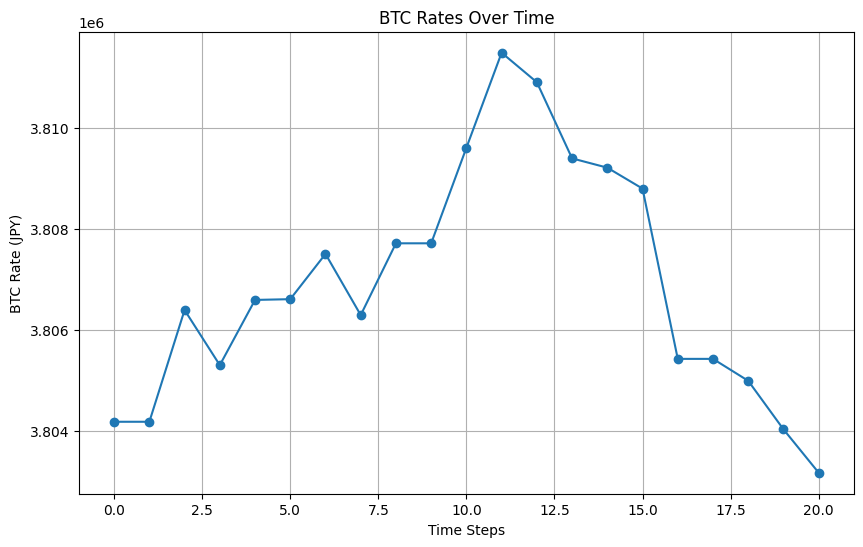

In [36]:
import matplotlib.pyplot as plt

# Plotting the rates as a line graph
plt.figure(figsize=(10, 6))
plt.plot(rates, marker='o', linestyle='-')
plt.title("BTC Rates Over Time")
plt.xlabel("Time Steps")
plt.ylabel("BTC Rate (JPY)")
plt.grid(True)
plt.show()